In [14]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
data=load_iris()

In [15]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#data.data
# 5.1 to 0.2 is first flower
# next 4 is 2nd flower and so on
# fischer tried to classify flowers based on sepal length and sepal width. 
# Check this on feature names
# this is 4 dimensional data

In [19]:
#plt.scatter?

In [20]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
data.data.shape

(150, 4)

In [22]:
data.target.shape

(150,)

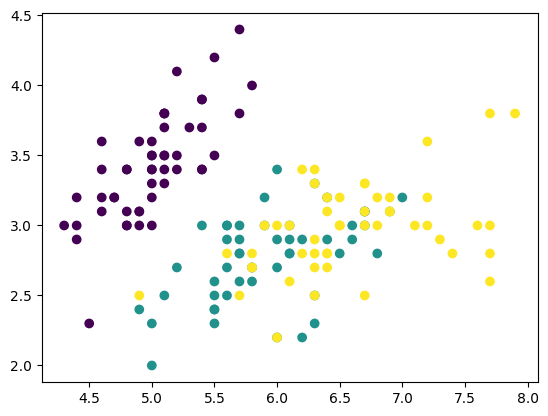

In [23]:
plt.scatter(data.data[:,0],data.data[:,1],c=data.target)
# colouring them by label
# one class is seperable from the other easily

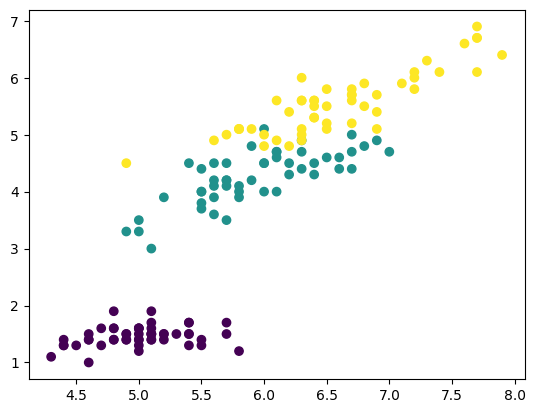

In [24]:
plt.scatter(data.data[:,0],data.data[:,2],c=data.target)
#plt.scatter(data.data[:,0],data.data[:,2])

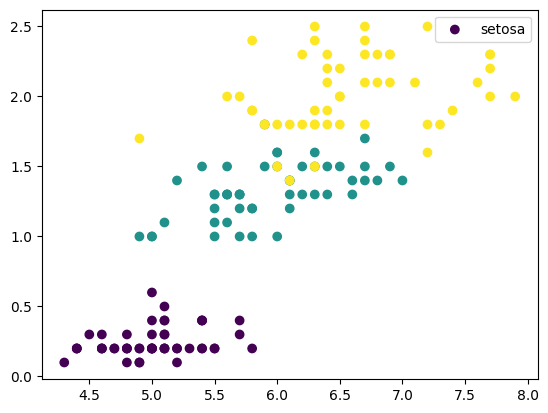

In [25]:
plt.scatter(data.data[:,0],data.data[:,3],c=data.target)
plt.legend(data.target_names)
#plt.legend([0,1,2])

In [26]:
# we can do 1vs1 or each vs each.
# we have 3 classes.
#first we will try 1vs1

In [27]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
models={}
#creating an empty dictionary which can contain key value pairs
#models[1]=4
#models['today']='nice weather'
#models[(3,2)]=7
data_train, data_test, t_train, t_test = train_test_split(
    data.data,data.target, test_size=0.3, random_state=42, stratify=data.target)

In [29]:
data_train.shape,t_train.shape

((105, 4), (105,))

In [30]:
t_train[:5]

array([1, 1, 0, 2, 1])

In [31]:
np.where?

Call signature:  np.where(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <built-in function where>
Docstring:      
where(condition, [x, y], /)

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes


In [32]:
data_train

array([[5.1, 2.5, 3. , 1.1],
       [6.2, 2.2, 4.5, 1.5],
       [5.1, 3.8, 1.5, 0.3],
       [6.8, 3.2, 5.9, 2.3],
       [5.7, 2.8, 4.1, 1.3],
       [6.7, 3. , 5.2, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.6, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [7.1, 3. , 5.9, 2.1],
       [6.5, 3.2, 5.1, 2. ],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.4, 3.8, 1.1],
       [7.2, 3.2, 6. , 1.8],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [6.3, 2.7, 4.9, 1.8],
       [7.6, 3. , 6.6, 2.1],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.5, 4. , 1.3],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.6, 2.9, 3.6, 1.3],
       [4.8, 3

In [33]:
t_train

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [34]:
ix=np.where((t_train==0) + (t_train==1))[0] #we put 0 because the array is only 1 element
print(ix)
#doing this so that we can get the indeces of the flowers

[  0   1   2   4   6   7   8  11  12  13  14  16  17  19  20  24  25  26
  27  28  29  30  31  32  33  34  35  36  39  41  43  45  46  48  50  51
  52  54  56  57  58  59  60  61  63  64  67  69  70  72  75  76  79  80
  84  86  89  90  91  92  93  94  95  97  99 100 101 102 103 104]


In [35]:
for i in range(3):
    for j in range(3):
        if i<j:
            #print(f"Build a classifier for {i} vs {j}")
            #print("Build a classifier for {i} vs {j}")
            print(f"Build a classifier for {data.target_names[i]} vs {data.target_names[j]}")
            models[(i,j)]=SVC(kernel='rbf')
            ix=np.where((t_train==i) + (t_train==j))[0] #we put 0 because the array is only 1 element
            print(ix)
            models[(i,j)].fit(data_train[ix,:],t_train[ix])

Build a classifier for setosa vs versicolor
[  0   1   2   4   6   7   8  11  12  13  14  16  17  19  20  24  25  26
  27  28  29  30  31  32  33  34  35  36  39  41  43  45  46  48  50  51
  52  54  56  57  58  59  60  61  63  64  67  69  70  72  75  76  79  80
  84  86  89  90  91  92  93  94  95  97  99 100 101 102 103 104]
Build a classifier for setosa vs virginica
[  2   3   5   6   7   8   9  10  11  12  15  16  17  18  20  21  22  23
  25  26  27  30  31  34  35  37  38  39  40  41  42  43  44  46  47  49
  51  53  55  56  58  62  65  66  67  68  71  72  73  74  76  77  78  79
  80  81  82  83  84  85  87  88  89  95  96  98  99 100 102 104]
Build a classifier for versicolor vs virginica
[  0   1   3   4   5   9  10  13  14  15  18  19  21  22  23  24  28  29
  32  33  36  37  38  40  42  44  45  47  48  49  50  52  53  54  55  57
  59  60  61  62  63  64  65  66  68  69  70  71  73  74  75  77  78  81
  82  83  85  86  87  88  90  91  92  93  94  96  97  98 101 103]


In [36]:
models

{(0, 1): SVC(), (0, 2): SVC(), (1, 2): SVC()}

In [37]:
ix

array([  0,   1,   3,   4,   5,   9,  10,  13,  14,  15,  18,  19,  21,
        22,  23,  24,  28,  29,  32,  33,  36,  37,  38,  40,  42,  44,
        45,  47,  48,  49,  50,  52,  53,  54,  55,  57,  59,  60,  61,
        62,  63,  64,  65,  66,  68,  69,  70,  71,  73,  74,  75,  77,
        78,  81,  82,  83,  85,  86,  87,  88,  90,  91,  92,  93,  94,
        96,  97,  98, 101, 103], dtype=int64)

In [38]:
models

{(0, 1): SVC(), (0, 2): SVC(), (1, 2): SVC()}

In [39]:
data_test.shape
#45 samples with 4 features

(45, 4)

In [40]:
data_test[0,:]

array([7.3, 2.9, 6.3, 1.8])

In [41]:
data_test[0,:]

array([7.3, 2.9, 6.3, 1.8])

In [42]:
data_test[:1,:]

array([[7.3, 2.9, 6.3, 1.8]])

In [43]:
models[(0,1)].predict(data_test[:1,:])

array([1])

In [44]:
models[(0,2)].predict(data_test[:1,:])

array([2])

In [45]:
models[(1,2)].predict(data_test[:1,:])

array([2])

In [46]:
#so most of it says that it is class 2

In [47]:
t_test[0]
#what class is it in reality

2

In [48]:
a=[models[m].predict(data_test[:1,:])[0] for m in models]
a
#did list interpolation
#just called all the 3 models together so that we can see together instead of typing thrice to see which class it is in

[1, 2, 2]

In [49]:
#compute the majority
#then apply this to all the samples in the test set
#compute accuracy
#confusion matrix will be a 3v3 here. There will be 6 boxes in the matrix which
#have not been predicted right

In [50]:
#compute the majority/histogram
h,bin=np.histogram(a,bins=3,range=(-0.5,2.5))
h

array([0, 1, 2], dtype=int64)

In [51]:
np.argmax(h)

2

In [52]:
t_test[:10]

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2])

In [53]:
yyyyy=[1,5,3,7]

In [54]:
#apply to all the samples in the test set
#always use list interpolation instead of for loop
#[predict(x) for x in data_test]

In [55]:
#it only works now for matrices of samples containing a single sample
#after doing x reshape, now it only works now for a single sample (a vector)
def onevsonepredict(x,models,data_test):
    x=x.reshape((1,4))
    #a=[models[m].predict(data_test[:1,:])[0] for m in models]
    a=[models[m].predict(x)[0] for m in models]
    #print(a)
    h,bin=np.histogram(a,bins=3,range=(-0.5,2.5))
    #print(h)
    return np.argmax(h)

In [56]:
#test that it works
onevsonepredict(data_test[1,:],models,data_test)

1

In [57]:
predtest=np.array([onevsonepredict(x,models,data_test) for x in data_test])
predtest

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1], dtype=int64)

In [58]:
data_test[0,:].shape

(4,)

In [59]:
data_test[0,:].reshape((4,))

array([7.3, 2.9, 6.3, 1.8])

In [60]:
data_test[0,:].reshape((4,1))

array([[7.3],
       [2.9],
       [6.3],
       [1.8]])

In [61]:
#how to reshape one sample into a matrix with a single sample(row)
data_test[0,:].reshape((1,4))

array([[7.3, 2.9, 6.3, 1.8]])

In [64]:
#compute accuracy
t_test==predtest
t_test
t_test==predtest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True])

In [96]:
t_test==predtest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True])

In [98]:
(t_test==predtest)+0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [93]:
np.sum(t_test==predtest)/len(t_test)

0.9555555555555556

In [95]:
import sklearn
#now done the easy/lazy way
sklearn.metrics.accuracy_score(t_test,predtest)

0.9555555555555556

In [104]:
#confusion matrix
sklearn.metrics.confusion_matrix(t_test,predtest)
#rows are true class, columns are predicted class
#so setosa were all predicted correctly, virgi and versi each had 1 wrongly pred
#there are no false positives and false negatives here.
#only wrongs

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)